# Librerias

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Cargamos datos

In [2]:
df_limpio = pd.read_csv("../01_data/train_nonull_nooutliers_encoding.csv", index_col = 0)
df_limpio.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
id,,,,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,3.0,5.0,0.0
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,4.0,6.0,5.0
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,4.0,3.0,3.0
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,2.0,4.0,0.0
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,3.0,4.0,4.0


# Decision Tree

In [3]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df_limpio.drop('price', axis =1)
y = df_limpio['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [5]:
# Eliminar las columnas categóricas originales de los datos de entrenamiento
X_train = X_train.drop(columns=['cut', 'color', 'clarity'])

# Verificar que las columnas se hayan eliminado correctamente
print(X_train.head())

       carat  depth  table     x     y     z  cut_encoded  color_encoded  \
id                                                                         
24247   0.80   63.9   56.0  5.84  5.87  3.74          2.0            3.0   
29562   1.23   61.4   56.0  6.89  6.91  4.24          4.0            2.0   
13128   0.27   62.1   57.0  4.13  4.15  2.57          4.0            6.0   
4330    0.32   60.2   58.0  4.47  4.43  2.68          3.0            2.0   
39131   0.72   60.3   58.0  5.81  5.76  3.49          3.0            5.0   

       clarity_encoded  
id                      
24247              2.0  
29562              6.0  
13128              5.0  
4330               4.0  
39131              0.0  


In [6]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: total: 0 ns
Wall time: 0 ns


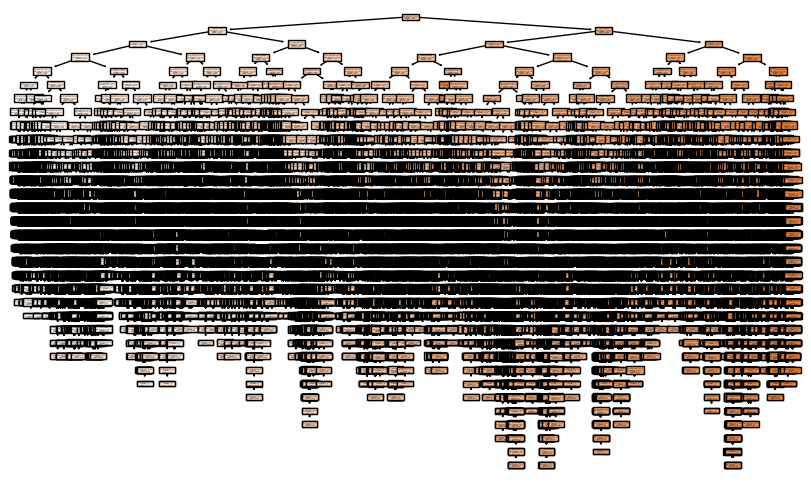

In [7]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();